## 1. 파이케럿에 데이터를 확인한다

In [1]:
from pycaret.datasets import get_data

In [2]:
data = get_data('heart_disease')

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


### 판다스로 사용하기 위해 데이터를 저장

In [3]:
data.to_csv("../data/heart_disease.csv", index=False)

In [4]:
data.shape

(270, 14)

In [5]:
import pandas as pd

In [6]:
df_data = pd.read_csv("../data/heart_disease.csv")

In [7]:
df_data.shape

(270, 14)

## 2. 파이캐럿 분류 모델 처리하기 

In [8]:
from pycaret.classification import *

## 2-1  데이터 세팅하기 

- 특징은 내부에서 데이터 전처리를 전부 수행한다. 

In [9]:
model1 = setup(data = data, target = 'Disease')

,Description,Value
0,Session id,2298
1,Target,Disease
2,Target type,Binary
3,Original data shape,"(270, 14)"
4,Transformed data shape,"(270, 14)"
5,Transformed train set shape,"(189, 14)"
6,Transformed test set shape,"(81, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


## 2-2 분류 모델 

### 메트릭스 확인 

In [10]:
all_metrics = get_metrics()

In [11]:
all_metrics

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Multiclass,Custom
ID,,,,,,,,,
acc,Accuracy,Accuracy,<function accuracy_score at 0x1473c2310>,accuracy,pred,{},True,True,False
auc,AUC,AUC,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(roc_auc_score, needs_proba=True, e...",pred_proba,"{'average': 'weighted', 'multi_class': 'ovr'}",True,True,False
recall,Recall,Recall,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(recall_score, average=weighted)",pred,{'average': 'weighted'},True,True,False
precision,Precision,Prec.,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(precision_score, average=weighted)",pred,{'average': 'weighted'},True,True,False
f1,F1,F1,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(f1_score, average=weighted)",pred,{'average': 'weighted'},True,True,False
kappa,Kappa,Kappa,<function cohen_kappa_score at 0x1473c2430>,make_scorer(cohen_kappa_score),pred,{},True,True,False
mcc,MCC,MCC,<function matthews_corrcoef at 0x1473c2550>,make_scorer(matthews_corrcoef),pred,{},True,True,False


### 분류 모델 확인하기 

In [12]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


##  모델 생성하기 

In [13]:
random_forest = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8947,0.9773,1.0000,0.8000,0.8889,0.7912,0.8090
1,0.7895,0.8750,0.5000,1.0000,0.6667,0.5366,0.6055
2,0.8421,0.9545,0.7500,0.8571,0.8000,0.6705,0.6746
3,0.7895,0.9205,0.7500,0.7500,0.7500,0.5682,0.5682
4,0.8947,0.9886,0.8750,0.8750,0.8750,0.7841,0.7841
5,0.7895,0.9333,0.6667,0.8571,0.7500,0.5730,0.5866
6,0.8947,0.9778,1.0000,0.8182,0.9000,0.7912,0.8090
7,0.7895,0.9222,0.7778,0.7778,0.7778,0.5778,0.5778
8,0.7895,0.9556,0.6667,0.8571,0.7500,0.5730,0.5866


## 모델 성능을 그래프로 확인하기 : auc

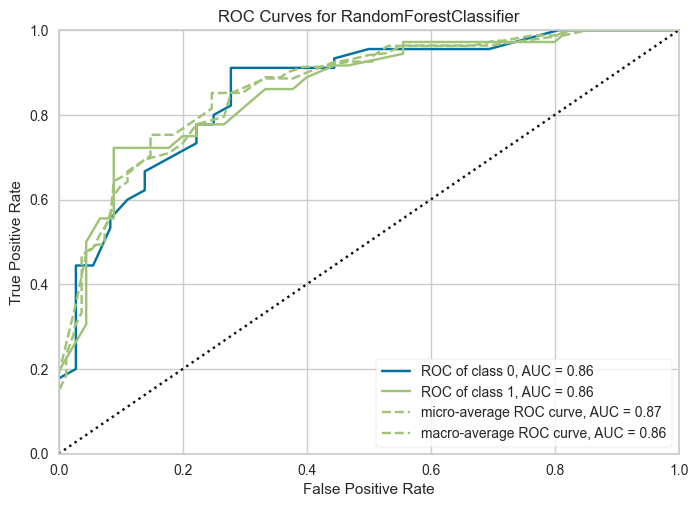

In [14]:
plot_model(random_forest, plot = 'auc')

## 모델의 성능을 확인하기 : 혼동행렬

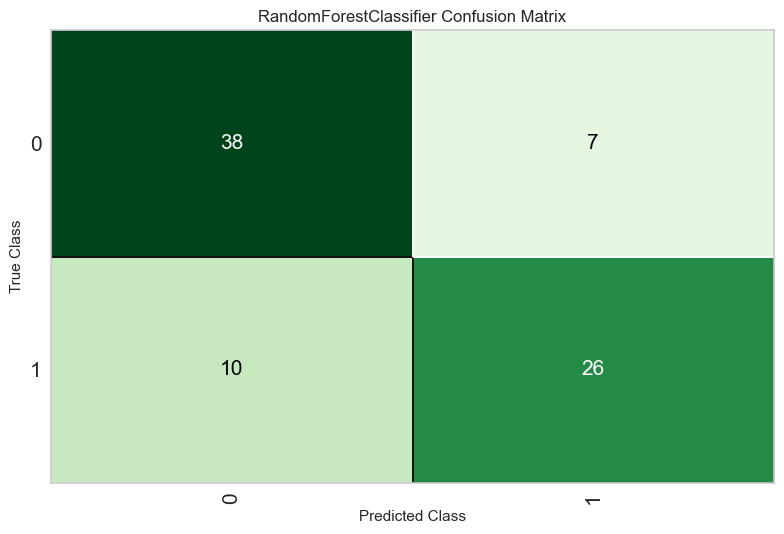

In [15]:
plot_model(random_forest , plot = 'confusion_matrix')

### 혼동행렬을 퍼센트로 확인하기 

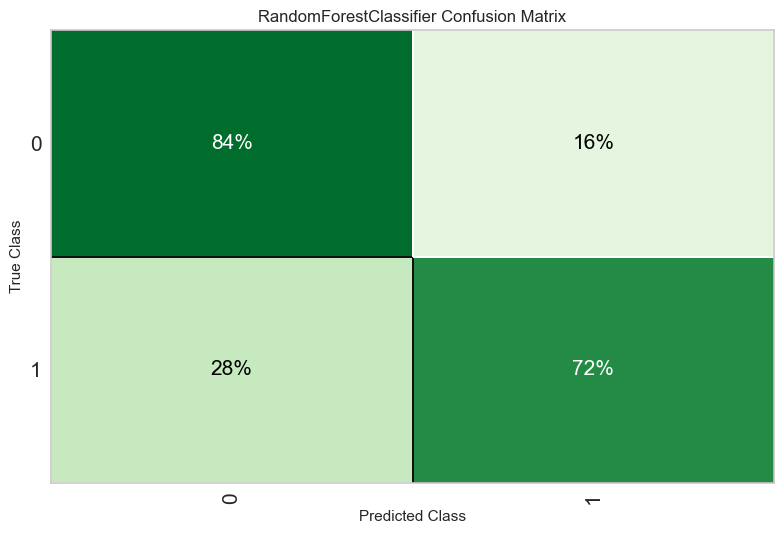

In [16]:
plot_model(random_forest , plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

### 모델의 분포를 확인하기 

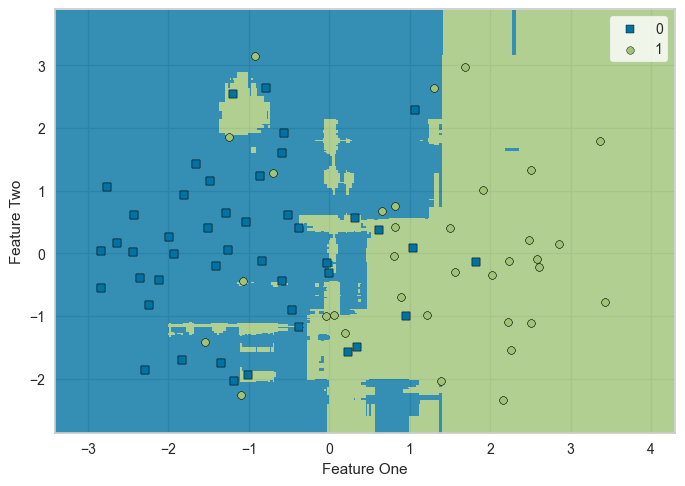

In [17]:
plot_model(random_forest, plot = 'boundary', use_train_data = True)

### 모델의 중요 피처 정보 확인 

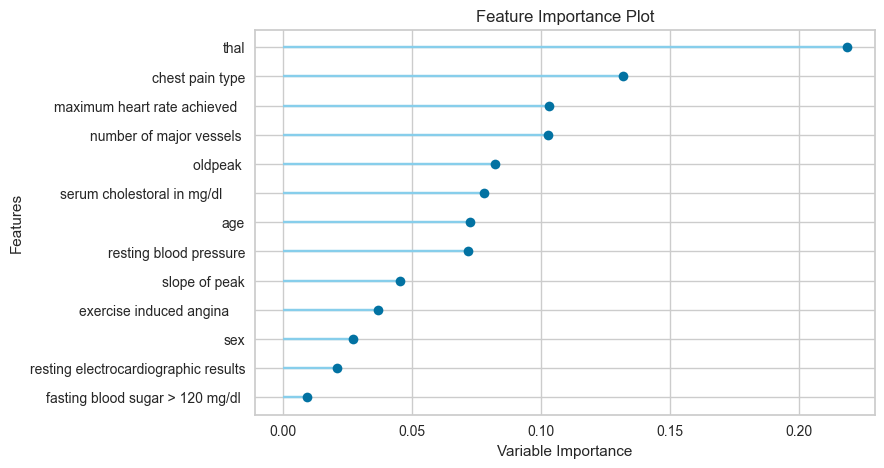

In [18]:
plot_model(random_forest, plot = 'feature_all', use_train_data = True)

## 모델 설명하기 

- SHAP 로 현재 모델의 특정을 설명한다

In [20]:
import numpy as np

In [22]:
np.bool = np.bool_

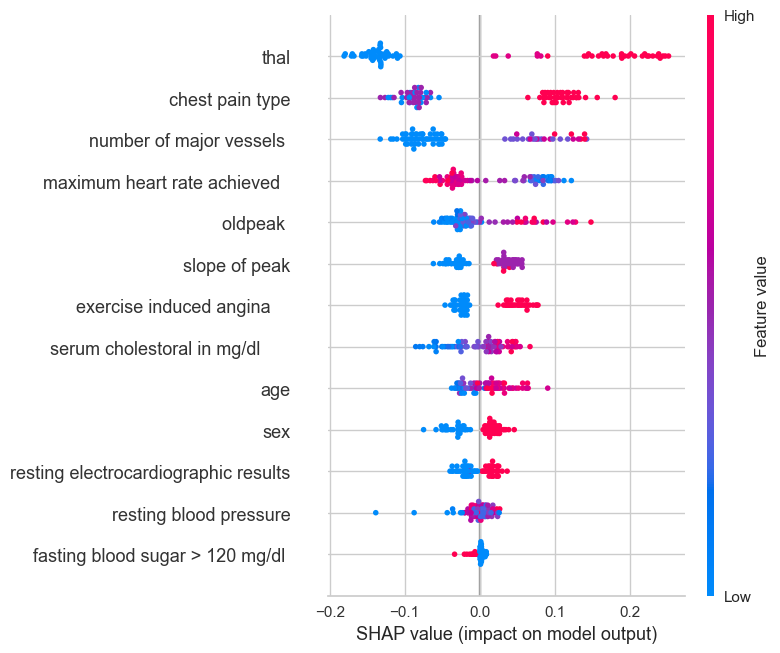

In [23]:
interpret_model(random_forest)

## 예측을 확인하기 

In [24]:
predictions = predict_model(random_forest)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7901,0.8599,0.7222,0.7879,0.7536,0.5714,0.5731


In [25]:
predictions[['Disease','prediction_label','prediction_score']].head()

,Disease,prediction_label,prediction_score
183,0,0,0.71
51,0,0,0.97
118,0,0,0.71
186,1,1,0.88
110,1,1,0.62
